In [8]:
## Loading the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

In [2]:
users = pd.read_csv('users_final.csv')
receipts = pd.read_csv('receipts_final.csv')
brands = pd.read_csv('brands_final.csv')

In [3]:
(users.isnull().sum()/len(users))*100

Unnamed: 0      0.000000
user_id         0.000000
active          0.000000
createdDate     0.000000
lastLogin       0.000000
role            0.000000
signUpSource    2.358491
state           2.830189
dtype: float64

In [4]:
(receipts.isnull().sum()/len(receipts))*100

Unnamed: 0                                   0.000000
receipt_id                                   0.000000
bonusPointsEarned                           51.385165
bonusPointsEarnedReason                     51.385165
createDate                                   0.000000
dateScanned                                  0.000000
finishedDate                                 0.000000
modifyDate                                   0.000000
pointsAwardedDate                            0.000000
pointsEarned                                45.576408
purchaseDate                                 0.000000
purchasedItemCount                          43.252904
rewardsReceiptItemList                      39.320822
rewardsReceiptStatus                         0.000000
totalSpent                                  38.873995
userId                                       0.000000
rrIL.barcode                                49.865952
rrIL.description                            47.810545
rrIL.finalPrice             

In [5]:
(brands.isnull().sum()/len(brands))*100

Unnamed: 0       0.000000
_id              0.000000
barcode          0.000000
category        13.281919
name             0.000000
topBrand        52.442159
brandCode       23.050557
cpg.$ref         0.000000
cpg.$id.$oid     0.000000
dtype: float64

In [6]:
users.drop('Unnamed: 0', axis = 1, inplace = True)
receipts.drop('Unnamed: 0', axis = 1, inplace = True)
brands.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
receipts.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,...,rrIL.itemNumber,rrIL.needsFetchReviewReason,rrIL.originalMetaBriteQuantityPurchased,rrIL.pointsEarned,rrIL.targetPrice,rrIL.competitiveProduct,rrIL.userFlaggedDescription,rrIL.deleted,rrIL.priceAfterCoupon,rrIL.metabriteCampaignId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 10:25:31,2021-01-03 10:25:31,2021-01-03 10:25:31,2021-01-03 10:25:36,2021-01-03 10:25:31,500.0,2021-01-02 19:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 10:24:43,2021-01-03 10:24:43,2021-01-03 10:24:43,2021-01-03 10:24:48,2021-01-03 10:24:43,150.0,2021-01-02 10:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 10:25:37,2021-01-03 10:25:37,None,2021-01-03 10:25:42,None,5.0,2021-01-02 19:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 10:25:34,2021-01-03 10:25:34,2021-01-03 10:25:34,2021-01-03 10:25:39,2021-01-03 10:25:34,5.0,2021-01-02 19:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 10:25:06,2021-01-03 10:25:06,2021-01-03 10:25:11,2021-01-03 10:25:11,2021-01-03 10:25:06,5.0,2021-01-02 10:25:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# !pip install -U pandasql

In [21]:
# !pip install pysqldf

In [9]:
pysqldf = lambda q: sqldf(q, globals())

In [16]:
q = """SELECT * 
       FROM users 
       LIMIT 10;"""

names = pysqldf(q)
names

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,1,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
1,5ff1e1eacfcf6c399c274ae6,1,2021-01-03 10:25:30,2021-01-03 10:25:30,consumer,Email,WI
2,5ff1e1e8cfcf6c399c274ad9,1,2021-01-03 10:25:28,2021-01-03 10:25:28,consumer,Email,WI
3,5ff1e1b7cfcf6c399c274a5a,1,2021-01-03 10:24:39,2021-01-03 10:24:39,consumer,Email,WI
4,5ff1e1f1cfcf6c399c274b0b,1,2021-01-03 10:25:37,2021-01-03 10:25:37,consumer,Email,WI
5,5ff1e1e4cfcf6c399c274ac3,1,2021-01-03 10:25:24,2021-01-03 10:25:24,consumer,Email,WI
6,5ff1e1b4cfcf6c399c274a54,1,2021-01-03 10:24:36,2021-01-03 10:24:36,consumer,Email,WI
7,5ff370c562fde912123a5e0e,1,2021-01-04 14:47:17,2021-01-04 14:50:50,consumer,Email,WI
8,5ff36d0362fde912123a5535,1,2021-01-04 14:31:15,2021-01-04 14:34:42,consumer,Email,WI
9,5ff36d83135e7011bcb864d6,1,2021-01-04 14:33:23,2021-01-04 14:33:23,consumer,Email,WI


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       212 non-null    object
 1   active        212 non-null    bool  
 2   createdDate   212 non-null    object
 3   lastLogin     212 non-null    object
 4   role          212 non-null    object
 5   signUpSource  207 non-null    object
 6   state         206 non-null    object
dtypes: bool(1), object(6)
memory usage: 10.3+ KB


In [18]:
users['role'].value_counts()

consumer       204
fetch-staff      8
Name: role, dtype: int64

In [2]:
![Fetch_ER_diag.png](attachment:Fetch_ER_diag.png)

zsh:1: number expected


## Question 1
### What are the top 5 brands by receipts scanned for most recent month?

In [10]:
try:
    top_5_brands_by_receipts_scanned_for_most_recent_month = """ WITH receipt AS (SELECT
                     user_id, receipt_id 
                     FROM receipts
                     WHERE scannedDate = (SELECT EXTRACT(MONTH FROM dateScanned) 
                                        FROM Receipts
                                        ORDER BY EXTRACT(MONTH FROM dateScanned DESC
                                        LIMIT 1
                                      )
                    ),

    user_brand AS (SELECT u.user_id, t.item_id, t.quantity 
                   FROM users u 
                   JOIN transaction t ON user_id
                  ),

    cte AS( SELECT u.user_id, u.item_id, u.quantity , i.brand_id 
            FROM user_brand u
            JOIN items i
            ON item_id
          )

    cte1 AS ( SELECT cte.brand_id, COUNT(cte.quantity) 
             FROM cte GROUP BY 1 ORDER BY COUNT(cte.quantity) DESC LIMIT 5)



    SELECT brands.name 
    FROM brands 
    JOIN cte1 
    ON cte1 using(brand_id);
    
    """
    names = pysqldf(top_5_brands_by_receipts_scanned_for_most_recent_month)
    names
except:
    print("Since we do not have the data to run the above query, please take a look above at the query to judge it.")
    


Since we do not have the data to run the above query, please take a look above at the query to judge it.


## Question 2
### How does the ranking of the top 5 brands by receipts scanned for the recent month compare to the ranking for the previous month?

In [11]:
try:
    top_5_brands_by_receipts_scanned_for_the_previous_month = """WITH receipt AS( SELECT user_id, receipt_id 
                 FROM receipts
                 WHERE scannedDate = (SELECT EXTRACT(MONTH FROM dateScanned) 
                                      FROM Receipts
                                      ORDER BY EXTRACT(MONTH FROM dateScanned DESC
                                              LIMIT 1
                                             )
        ),

        user_brand AS (SELECT receipt.user_id, item_id, quantity 
                       FROM users 
                       JOIN transaction ON user_id
                      ),

        cte AS (SELECT u.user_id, u.item_id, u.quantity, i.brand_id 
                FROM user_brand 
                JOIN items 
                ON item_id)

        cte1 AS (SELECT cte.brand_id, COUNT(cte.quantity) 
                 FROM cte 
                 GROUP BY 1 
                 ORDER BY COUNT(cte.quantity) DESC LIMIT 5)

        SELECT brands.name 
        FROM brands 
        JOIN cte1 ON cte1 
        USING(brand_id);
        """
    names = pysqldf(top_5_brands_by_receipts_scanned_for_the_previous_month)
    names

except:
    print("Since we do not have the data to run the above query, please take a look above at the query to judge it.")


Since we do not have the data to run the above query, please take a look above at the query to judge it.


## Question 3
### When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [22]:
receipts.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,rrIL.barcode,rrIL.description,rrIL.finalPrice,rrIL.itemPrice,rrIL.needsFetchReview,rrIL.partnerItemId,rrIL.preventTargetGapPoints,rrIL.quantityPurchased,rrIL.userFlaggedBarcode,rrIL.userFlaggedNewItem,rrIL.userFlaggedPrice,rrIL.userFlaggedQuantity,rrIL.originalMetaBriteBarcode,rrIL.originalMetaBriteDescription,rrIL.pointsNotAwardedReason,rrIL.pointsPayerId,rrIL.rewardsGroup,rrIL.rewardsProductPartnerId,rrIL.brandCode,rrIL.competitorRewardsGroup,rrIL.discountedItemPrice,rrIL.originalReceiptItemText,rrIL.itemNumber,rrIL.needsFetchReviewReason,rrIL.originalMetaBriteQuantityPurchased,rrIL.pointsEarned,rrIL.targetPrice,rrIL.competitiveProduct,rrIL.userFlaggedDescription,rrIL.deleted,rrIL.priceAfterCoupon,rrIL.metabriteCampaignId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 10:25:31,2021-01-03 10:25:31,2021-01-03 10:25:31,2021-01-03 10:25:36,2021-01-03 10:25:31,500.0,2021-01-02 19:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6,4011,ITEM NOT FOUND,26.0,26.0,False,1.0,True,5.0,4011.0,True,26.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 10:24:43,2021-01-03 10:24:43,2021-01-03 10:24:43,2021-01-03 10:24:48,2021-01-03 10:24:43,150.0,2021-01-02 10:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052,4011,ITEM NOT FOUND,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 10:25:37,2021-01-03 10:25:37,None,2021-01-03 10:25:42,None,5.0,2021-01-02 19:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b,NaN,NaN,NaN,NaN,False,1.0,True,NaN,4011.0,True,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 10:25:34,2021-01-03 10:25:34,2021-01-03 10:25:34,2021-01-03 10:25:39,2021-01-03 10:25:34,5.0,2021-01-02 19:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6,4011,ITEM NOT FOUND,28.0,28.0,False,1.0,True,4.0,4011.0,True,28.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 10:25:06,2021-01-03 10:25:06,2021-01-03 10:25:11,2021-01-03 10:25:11,2021-01-03 10:25:06,5.0,2021-01-02 10:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052,4011,ITEM NOT FOUND,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
receipts.totalSpent.isna().sum()

435

In [32]:
x = receipts[receipts.totalSpent.isna()]
x.rewardsReceiptStatus.value_counts()

SUBMITTED    434
PENDING        1
Name: rewardsReceiptStatus, dtype: int64

In [33]:
receipts.rewardsReceiptStatus.value_counts()

FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64

In [65]:
average_spent_by_status = 
       """
           SELECT rewardsReceiptStatus, AVG(totalSpent) AS average_spent_by_status
           FROM receipts
           WHERE rewardsReceiptStatus = 'FINISHED' OR rewardsReceiptStatus = 'REJECTED'
           GROUP BY rewardsReceiptStatus
           ORDER BY AVG(totalSpent) DESC;
       """

q3 = pysqldf(average_spent_by_status)
q3

,rewardsReceiptStatus,average_spent_by_status
0,FINISHED,80.854305
1,REJECTED,23.326056


In [66]:
average_spent_by_status = 
       """
           SELECT rewardsReceiptStatus, AVG(totalSpent) AS average_spent_by_status
           FROM receipts
           GROUP BY rewardsReceiptStatus
           ORDER BY AVG(totalSpent) DESC;
       """

df = pysqldf(average_spent_by_status)
df

,rewardsReceiptStatus,average_spent_by_status
0,FLAGGED,180.451739
1,FINISHED,80.854305
2,PENDING,28.032449
3,REJECTED,23.326056
4,SUBMITTED,NaN


In [67]:
df.fillna(0,inplace=True)

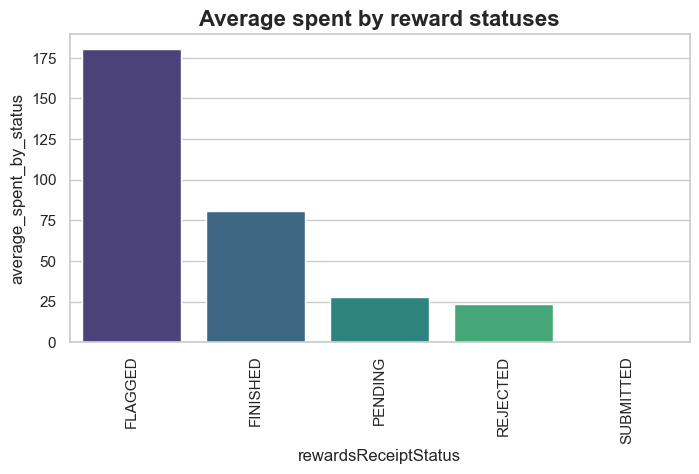

In [68]:
# df = q3
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
ax = sns.barplot( x = df['rewardsReceiptStatus'],y=df['average_spent_by_status'], palette = 'viridis')
plt.xticks(rotation = 90)
plt.title("Average spent by reward statuses", fontsize=16, fontweight="bold")
plt.show()

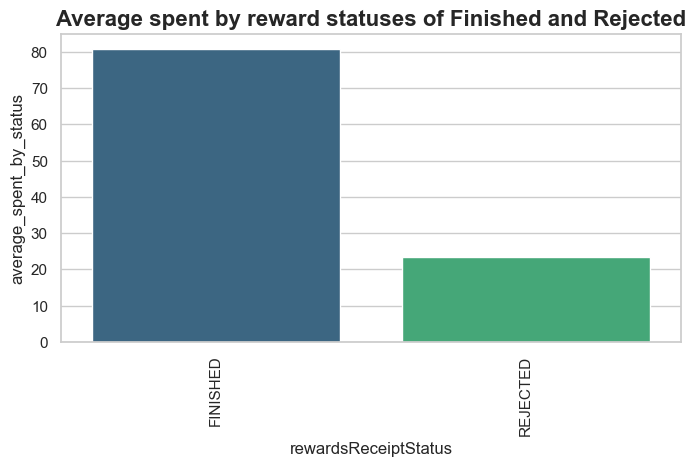

In [69]:
df = q3
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
ax = sns.barplot( x = df['rewardsReceiptStatus'],y=df['average_spent_by_status'], palette = 'viridis')
plt.xticks(rotation = 90)
plt.title("Average spent by reward statuses of Finished and Rejected", fontsize=16, fontweight="bold")
plt.show()

## Question 4
### When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?


In [70]:
receipts.purchasedItemCount.isna().sum()

484

In [71]:
x = receipts[receipts.purchasedItemCount.isna()]
x.rewardsReceiptStatus.value_counts()

SUBMITTED    434
PENDING       50
Name: rewardsReceiptStatus, dtype: int64

In [76]:
total_count_by_rewards_status = 
       """
           SELECT rewardsReceiptStatus, SUM(purchasedItemCount) AS total_count_by_rewards_status
           FROM receipts
           WHERE rewardsReceiptStatus = 'FINISHED' OR rewardsReceiptStatus = 'REJECTED'
           GROUP BY rewardsReceiptStatus
           ORDER BY SUM(purchasedItemCount) DESC;
       """

q4 = pysqldf(total_count_by_rewards_status)
q4

,rewardsReceiptStatus,total_count_by_rewards_status
0,FINISHED,8184.0
1,REJECTED,173.0


In [92]:
total_count_by_rewards_status = 
       """
           SELECT rewardsReceiptStatus, SUM(purchasedItemCount) AS total_count_by_rewards_status
           FROM receipts
           GROUP BY rewardsReceiptStatus
           ORDER BY SUM(purchasedItemCount) DESC;
       """

df = pysqldf(total_count_by_rewards_status)
df.fillna(0,inplace=True,axis=1)
df

,rewardsReceiptStatus,total_count_by_rewards_status
0,FINISHED,8184.0
1,FLAGGED,1014.0
2,REJECTED,173.0
3,SUBMITTED,0
4,PENDING,0


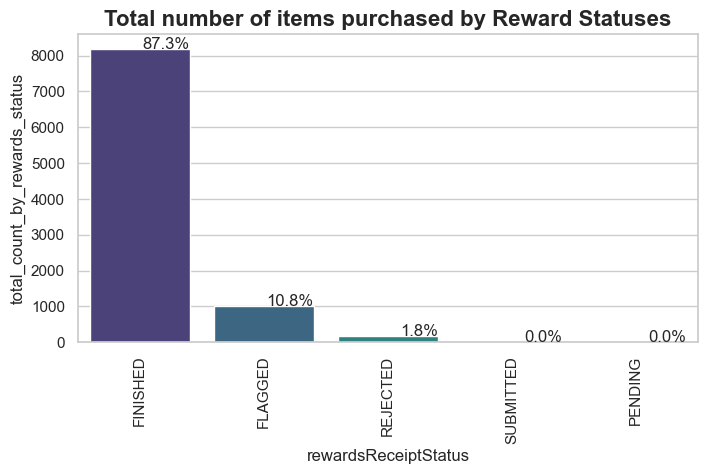

In [93]:
# df = q3
sns.set(style="whitegrid")
total = sum(df['total_count_by_rewards_status'])
plt.figure(figsize=(8,4))
ax = sns.barplot( x = df['rewardsReceiptStatus'],y=df['total_count_by_rewards_status'], palette = 'viridis')
plt.xticks(rotation = 90)
plt.title("Total number of items purchased by Reward Statuses", fontsize=16, fontweight="bold")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

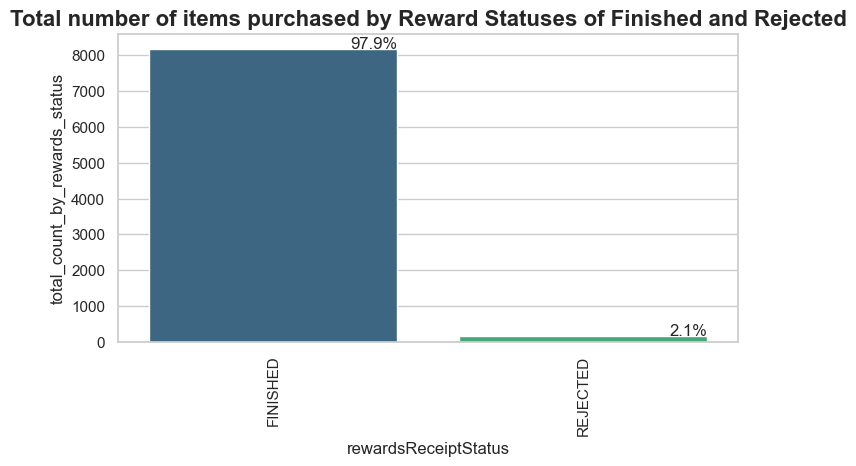

In [94]:
df = q4
sns.set(style="whitegrid")
total = sum(df['total_count_by_rewards_status'])
plt.figure(figsize=(8,4))
ax = sns.barplot( x = df['rewardsReceiptStatus'],y=df['total_count_by_rewards_status'], palette = 'viridis')
plt.xticks(rotation = 90)
plt.title("Total number of items purchased by Reward Statuses of Finished and Rejected", fontsize=16, fontweight="bold")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

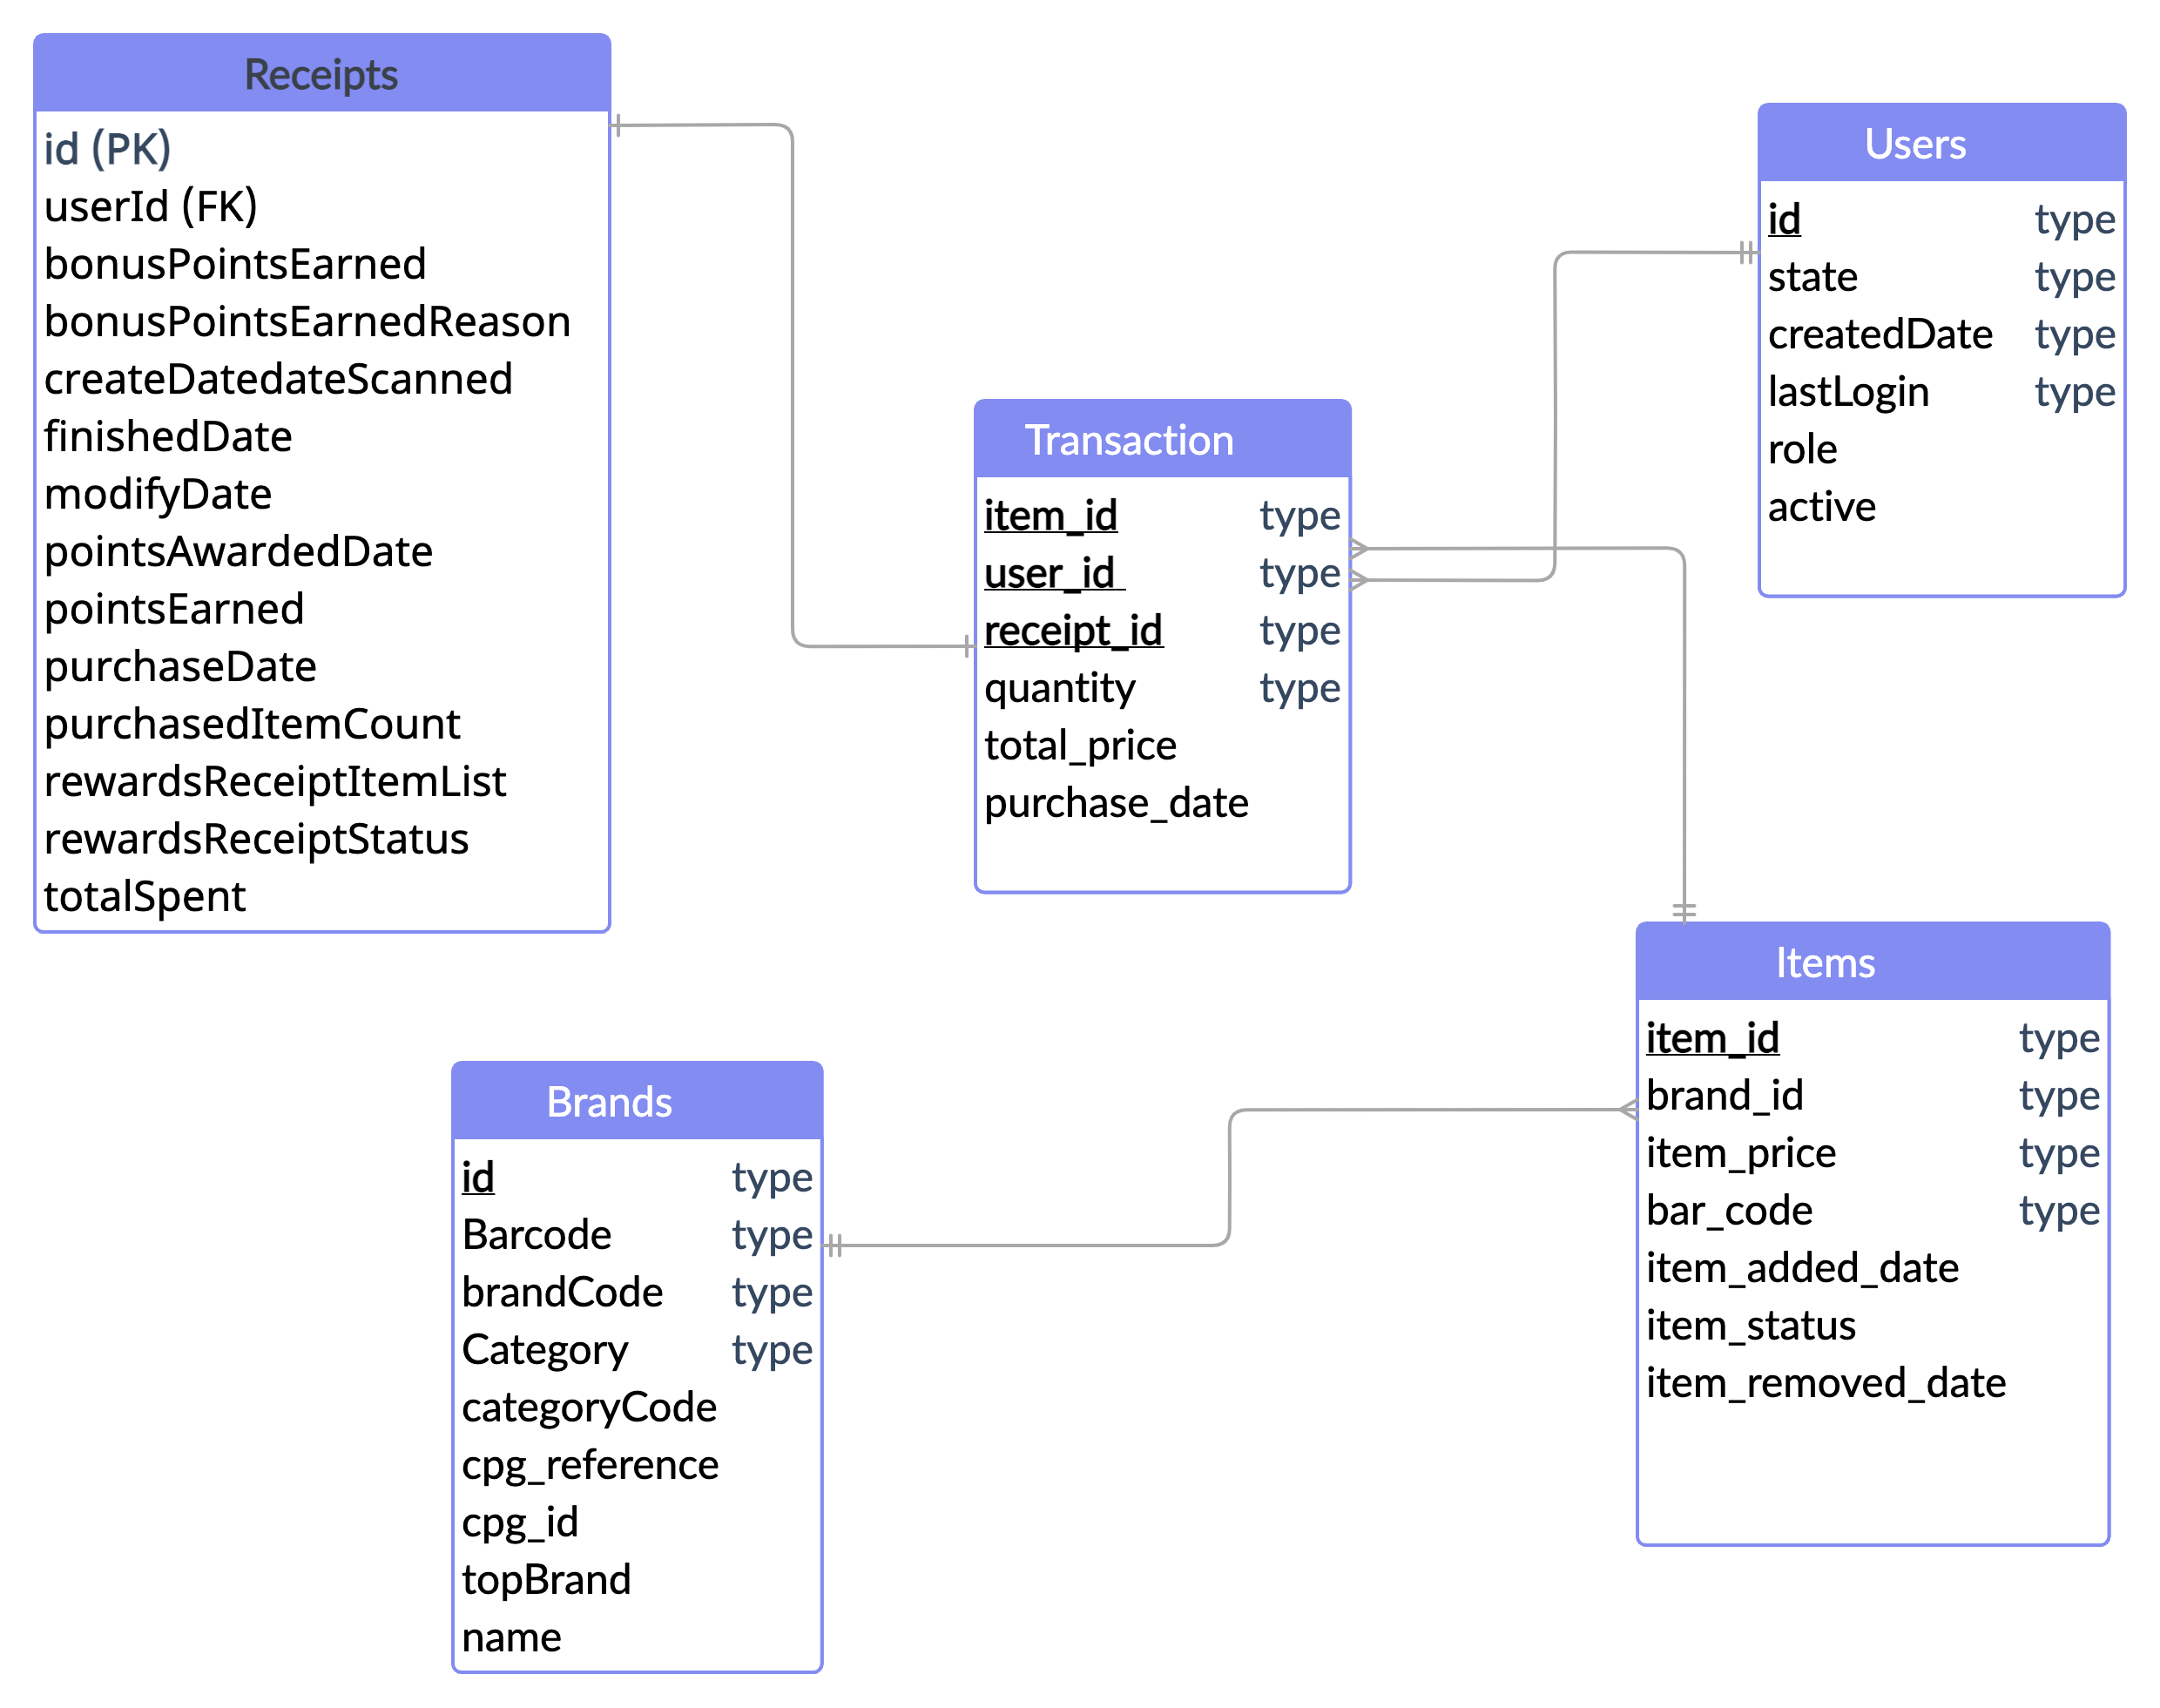

## Question 5
### Which brand has the most spend among users who were created within the past 6 months?

In [12]:
try:
    brand_having_most_spendf = """
        WITH users AS ( 
                        SELECT user_id 
                        FROM users
                        WHERE createddate >= "YYYY-MM-DD" AND createddate <= "YYYY-MM-DD"
                      ),

        user_brand AS (
                        SELECT u.user_id, t.item_id, t.quantity, t.total_price 
                        FROM users u
                        JOIN transaction t 
                        ON user_id
                      ),

        cte AS (
                 SELECT u.user_id, u.item_id, u.quantity, u.total_price, i.brand_id 
                 FROM user_brand 
                 JOIN items ON item_id
               ),

        cte1 AS (SELECT cte.brand_id, SUM(cte.total_price) 
                 FROM cte GROUP BY 1 
                 ORDER BY SUM(cte.total_price) DESC LIMIT 1)

        SELECT brands.name 
        FROM brands 
        JOIN cte1 
        ON cte1 USING(brand_id);
    """
    names = pysqldf(brand_having_most_spendf)
    names
except:
    print("Since we do not have the data to run the above query, please take a look above at the query to judge it.")
    

Since we do not have the data to run the above query, please take a look above at the query to judge it.


In [95]:
brands.head()

,_id,barcode,category,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,601ac115be37ce2ead437551,511111019862,Baking,test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


In [96]:
users.head()

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
1,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 10:25:30,2021-01-03 10:25:30,consumer,Email,WI
2,5ff1e1e8cfcf6c399c274ad9,True,2021-01-03 10:25:28,2021-01-03 10:25:28,consumer,Email,WI
3,5ff1e1b7cfcf6c399c274a5a,True,2021-01-03 10:24:39,2021-01-03 10:24:39,consumer,Email,WI
4,5ff1e1f1cfcf6c399c274b0b,True,2021-01-03 10:25:37,2021-01-03 10:25:37,consumer,Email,WI


In [97]:
receipts.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,rrIL.barcode,rrIL.description,rrIL.finalPrice,rrIL.itemPrice,rrIL.needsFetchReview,rrIL.partnerItemId,rrIL.preventTargetGapPoints,rrIL.quantityPurchased,rrIL.userFlaggedBarcode,rrIL.userFlaggedNewItem,rrIL.userFlaggedPrice,rrIL.userFlaggedQuantity,rrIL.originalMetaBriteBarcode,rrIL.originalMetaBriteDescription,rrIL.pointsNotAwardedReason,rrIL.pointsPayerId,rrIL.rewardsGroup,rrIL.rewardsProductPartnerId,rrIL.brandCode,rrIL.competitorRewardsGroup,rrIL.discountedItemPrice,rrIL.originalReceiptItemText,rrIL.itemNumber,rrIL.needsFetchReviewReason,rrIL.originalMetaBriteQuantityPurchased,rrIL.pointsEarned,rrIL.targetPrice,rrIL.competitiveProduct,rrIL.userFlaggedDescription,rrIL.deleted,rrIL.priceAfterCoupon,rrIL.metabriteCampaignId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 10:25:31,2021-01-03 10:25:31,2021-01-03 10:25:31,2021-01-03 10:25:36,2021-01-03 10:25:31,500.0,2021-01-02 19:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6,4011,ITEM NOT FOUND,26.0,26.0,False,1.0,True,5.0,4011.0,True,26.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 10:24:43,2021-01-03 10:24:43,2021-01-03 10:24:43,2021-01-03 10:24:48,2021-01-03 10:24:43,150.0,2021-01-02 10:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052,4011,ITEM NOT FOUND,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 10:25:37,2021-01-03 10:25:37,None,2021-01-03 10:25:42,None,5.0,2021-01-02 19:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b,NaN,NaN,NaN,NaN,False,1.0,True,NaN,4011.0,True,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 10:25:34,2021-01-03 10:25:34,2021-01-03 10:25:34,2021-01-03 10:25:39,2021-01-03 10:25:34,5.0,2021-01-02 19:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6,4011,ITEM NOT FOUND,28.0,28.0,False,1.0,True,4.0,4011.0,True,28.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 10:25:06,2021-01-03 10:25:06,2021-01-03 10:25:11,2021-01-03 10:25:11,2021-01-03 10:25:06,5.0,2021-01-02 10:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052,4011,ITEM NOT FOUND,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 6
### Which brand has the most transactions among users who were created within the past 6 months?

In [13]:
try:
    brand_having_most_transactions = """
    WITH users AS( 
                   SELECT user_id 
                   FROM users
                   WHERE createddate >= "YYYY-MM-DD" AND createddate <= "YYYY-MM-DD"
    ),

    user_brand AS (
                    SELECT u.user_id, t.item_id, t.quantity 
                    FROM users u
                    JOIN transaction t 
                    ON user_id
                   ),

    cte AS (
              SELECT u.user_id, u.item_id, u.quantity , i.brand_id 
              FROM user_brand u
              JOIN items i
              ON item_id
           ),


    cte1 as (
                SELECT cte.brand_id, COUNT(cte.quantity) 
                FROM cte GROUP BY 1 
                ORDER BY COUNT(cte.quantity) DESC LIMIT 1)

    SELECT brands.name 
    FROM brands 
    JOIN cte1 ON cte1 USING(brand_id);
    """
    names = pysqldf(brand_having_most_transactions)
    names
    
except:
    print("Since we do not have the data to run the above query, please take a look above at the query to judge it.")
    

Since we do not have the data to run the above query, please take a look above at the query to judge it.
